> Fullname: Yiming Zhang 
> Student ID: 35224436

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 4**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation functions below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X \sim N\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)).
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>



### (a) ELU

**Output range**
- when x ≤ 0, ELU(x) = 0.1(exp(x) - 1), since exp(x) ∈ (0, 1], output range is (-0.1, 0]
- when x > 0, ELU(x) = x, output range is (0, +∞)
- Therefore, the whole output range of ELU is (-0.1, +∞)

**Derivative**
- when x ≤ 0, $\frac{d}{dx}[ELU(x)]$ = $\frac{d}{dx}[0.1(exp(x) - 1)]$ = 0.1 * exp(x)
- when x > 0, $\frac{d}{dx}[ELU(x)]$ = $\frac{d}{dx}[x]$ = 1

**Final derivative**

$$\mathrm{ELU}'(x) =\begin{cases}
0.1\exp(x) & \text{if } x \leq 0 \\
1 & \text{if } x > 0
\end{cases}$$

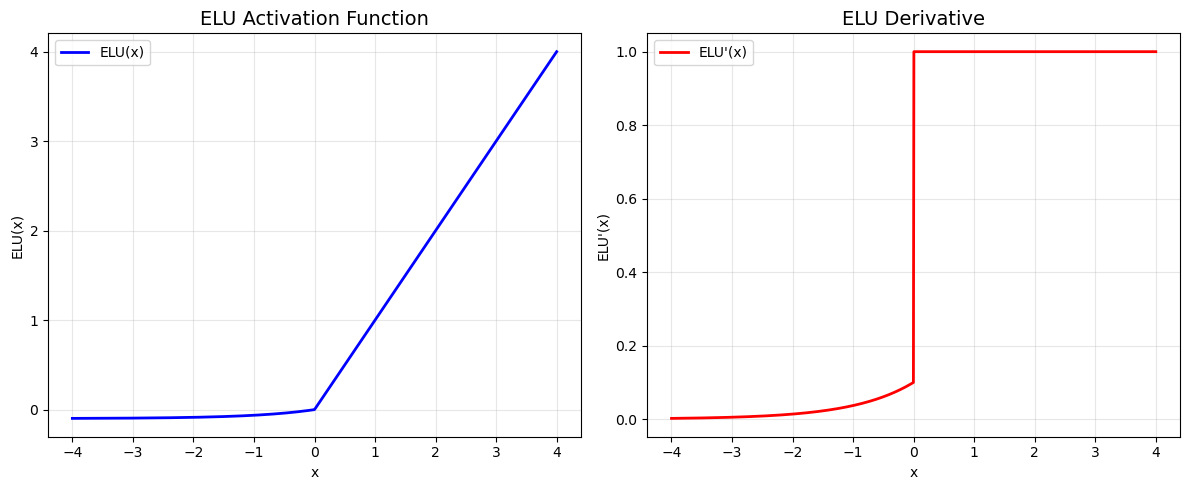

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create x values
x = np.linspace(-4, 4, 1000)

# ELU function and its derivative
def elu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Calculate function values
elu_values = elu(x)
elu_deriv_values = elu_derivative(x)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ELU function
axes[0].plot(x, elu_values, 'b-', linewidth=2, label='ELU(x)')
axes[0].set_title('ELU Activation Function', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('ELU(x)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# ELU derivative
axes[1].plot(x, elu_deriv_values, 'r-', linewidth=2, label="ELU'(x)")
axes[1].set_title('ELU Derivative', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel("ELU'(x)")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('elu_activation.png', dpi=300, bbox_inches='tight')
plt.show()


### (b) GELU

**Output range**
- Since Φ(x) ∈ [0, 1] and x ∈ (-∞, +∞)
- when x → -∞, GELU(x) → 0
- when x → +∞, GELU(x) → x
- Hence, the output range of GELU is (-∞, +∞)

**Derivative**

According to the Product rule, we have
$$
\frac{d}{dx}[GELU(x)] = \mathrm{(x)}'·Φ(x) + \mathrm{Φ}'(x)·x
$$
and we have:
$$
{Φ(x)}=\tfrac{1}{\sqrt{2\pi}}e^{-x^2/2}\
$$

**Final derivative**

$$\mathrm{GELU}'(x) = \Phi(x) + x \cdot \phi(x)$$

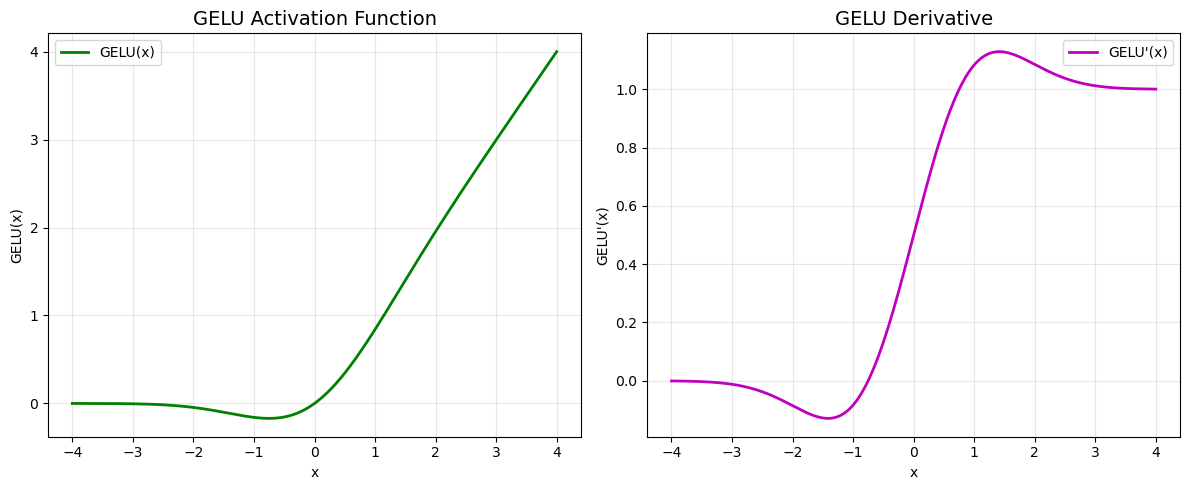

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create x values
x = np.linspace(-4, 4, 1000)

# GELU function and its derivative
def gelu(x):
    return x * norm.cdf(x)

def gelu_derivative(x):
    phi = norm.pdf(x)  # Standard normal probability density function
    return norm.cdf(x) + x * phi

# Calculate function values
gelu_values = gelu(x)
gelu_deriv_values = gelu_derivative(x)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# GELU function
axes[0].plot(x, gelu_values, 'g-', linewidth=2, label='GELU(x)')
axes[0].set_title('GELU Activation Function', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('GELU(x)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# GELU derivative
axes[1].plot(x, gelu_deriv_values, 'm-', linewidth=2, label="GELU'(x)")
axes[1].set_title('GELU Derivative', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel("GELU'(x)")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('gelu_activation.png', dpi=300, bbox_inches='tight')
plt.show()


####  <span style="color:red">**Question 1.2:**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**


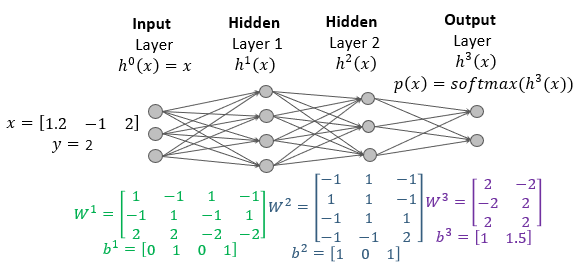

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(e)**</span>  What is the predicted label $\widehat{y}$? Is it a correct and an incorect prediction? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(g)**</span>  Why is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with, for example $M=4$ classes?   
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*You must show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your PyTorch code for your computation.*

####  <span style="color:red">**Question 1.3:**</span>
For **Question 1.3**, you have two options:
* **(1)** *perform the forward, backward propagation, and SGD update for `one mini-batch`* (**10 points**), or
* **(2)** *manually implement a feed-forward neural network* that can work on real tabular datasets (**20 points**).

You can choose either **(1)** or **(2)** to proceed.   

### <span style="color:red">**Option 1**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 10 points]<span></div>

**Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is $3 (Input)\rightarrow 5(ELU) \rightarrow 3(Output)$ as shown in the following figure. Note that the ELU has the same formula as the one in Q1.1.**


We feed a batch $X$ with the labels $Y$ as shown in the figure. Answer the following questions.

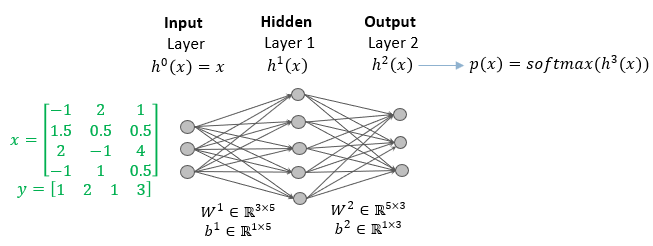

**You need to show both formulas, numerical results, and your PyTorch code for your computation for earning full marks.**

In [ ]:
import torch
student_id = 1234           #insert your student id here for example 1234
torch.manual_seed(student_id)

In [ ]:
#Code to generate random matrices and biases for W1, b1, W2, b2




**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$ (the pre-activation values of $h^1$)?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>


In [ ]:
#Show your code




<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(c)**</span>  What is the predicted value $\widehat{y}$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



(d) Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$ incurred by the mini-batch?

[0.5 point]

In [ ]:
#Show your code



**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[2 points]</span></div>

In [ ]:
#Show your code



### <span style="color:red">**Option 2**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 20 points]<span></div>

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**In Option 2, you need to implement a feed-forward NN manually using PyTorch and auto-differentiation of PyTorch. We then manually train the model on the MNIST dataset**.

We first download the `MNIST` dataset and preprocess it.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor with shape [C, H, W]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(28*28)) # Flatten the tensor to shape [-1,HW]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

Each data point has dimension `[28,28]`. We need to flatten it to a vector to input to our FFN.

In [ ]:
train_dataset.data = train_data.data.reshape(-1, 28*28)
test_dataset.data = test_data.data.reshape(-1, 28*28)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

We split the train and test sets into many mini-batches of 64.

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

**Develop the feed-forward neural networks**

**(a)** You need to develop the class `MyLinear` with the following skeleton. You need to declare the weight matrix and bias of this linear layer.

<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
class MyLinear(torch.nn.Module):
  def __init__(self, input_size, output_size):
    """
    input_size: the size of the input
    output_size: the size of the output
    """
    super().__init__()
    #Your code here
    self.W =
    self.b =

  #forward propagation
  def forward(self, x): #x is a mini-batch
    #Your code here

**(b)** You need to develop the class `MyFFN` with the following skeleton

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [ ]:
class MyFFN(torch.nn.Module):
  def __init__(self, input_size, num_classes, hidden_sizes, act = torch.nn.ReLU()):
    """
    input_size: the size of the input
    num_classes: the number of classes
    act is the activation function
    hidden_sizes is the list of hidden sizes
    for example input_size = 3, hidden_sizes = [5, 7], num_classes = 4, and act = torch.nn.ReLU()
    means that we are building up a FFN with the confirguration
    (3 (Input) -> 5 (ReLU) -> 7 (ReLU) -> 4 (Output))
    """
    super(MyFFN, self).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.act = act
    self.hidden_sizes = hidden_sizes
    self.num_layers = len(hidden_sizes) + 1

  def create_FFN(self):
    """
    This function creates the feed-forward neural network
    We stack many MyLinear layers
    """
    hidden_sizes = [self.input_size] + self.hidden_sizes + [self.num_classes]
    self.layers = []
    #Your code here


  def forward(self,x):
    """
    This implements the forward propagation of the batch x
    This needs to return the logits of x
    """
    #Your code here

  def compute_loss(self, x, y):
    """
    This function computes the cross-entropy loss
    You can use the built-in CE loss of PyTorch
    """
    #Your code here

  def update_SGD(self, x, y, learning_rate = 0.01):
    """
    This function updates the model parameters using SGD using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    #Your code here

  def update_SGDwithMomentum(self, x, y, learning_rate = 0.01, momentum = 0.9):
    """
    This function updates the model parameters using SGD with momentum using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    #Your code here

  def update_AdaGrad(self, x, y, learning_rate = 0.01):
    """
    This function updates the model parameters using AdaGrad using the batch (x,y)
    You need to implement the update rule manually and cannot rely on the built-in optimizer
    """
    #Your code here


In [ ]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = torch.nn.ReLU)
myFFN.create_FFN()
print(myFFN)

**(c)** Write the code to evaluate the accuracy of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
def compute_acc(model, data_loader):
  """
  This function computes the accuracy of the model on a data loader
  """
  #Your code here



**(d)** Write the code to evaluate the loss of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
def compute_loss(model, data_loader):
  """
  This function computes the loss of the model on a data loader
  """
  #Your code here


Train on the `MNIST` data with 50 epochs using `updateSGD`.

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_SGD(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

**(e)** Implement the function `updateSGDMomentum` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
#Your code here




**(f)** Implement the function `updateAdagrad` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
#Your code here

